In [1]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Import 5D array
df_A = pd.read_csv('AEP_daily.csv')
df_A ['Datetime']= pd.to_datetime(df_A['Datetime'])
df_A = df_A.set_index('Datetime')

def series_to_array(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1] #reshape to  list
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

pasos = 5
x = series_to_array(df_A, pasos) #segments the data to with specific steps (array w x n-w)

In [2]:
df_A_copy = df_A.copy()

df_A_values = df_A_copy.drop(df_A_copy.index[0:pasos],axis=0) # to get same rows while graphing


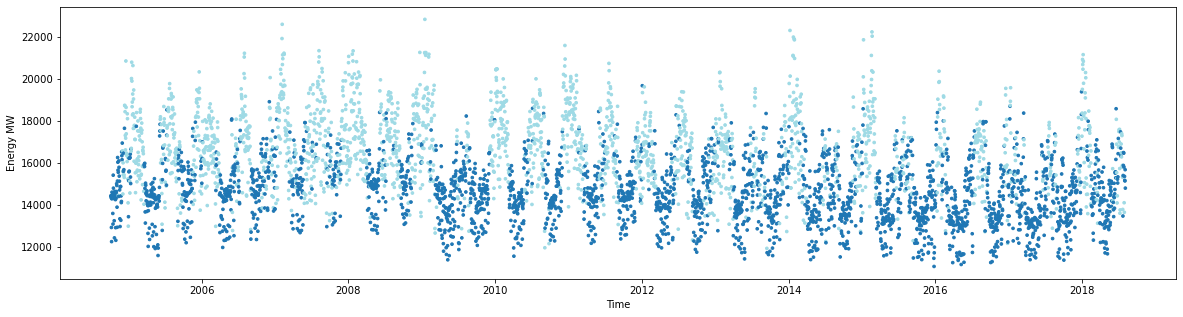

In [4]:
kmeans = KMeans(n_clusters=2,random_state=10).fit(x)

y_predict = kmeans.predict(x) 

plt.figure(figsize=(20,5))
plt.scatter(df_A_values.index, df_A_values['AEP_MW'], c=y_predict, cmap='tab20', s=7)
plt.xlabel('Time')
plt.ylabel('Energy MW')
plt.show()

In [36]:
df_A_values['Cluster'] = pd.Series(y_predict, index=df_A_values.index)
df_A_values

,AEP_MW,Cluster
Datetime,,
2004-10-06,14424.79167,0
2004-10-07,14449.41667,0
2004-10-08,14350.33333,0
2004-10-09,12934.54167,0
2004-10-10,12260.37500,0
...,...,...
2018-07-30,15368.08333,0
2018-07-31,15180.29167,0
2018-08-01,15151.16667,0


In [79]:
#Clus1 = 0
#Clus2 = 1

#Cluster1 = df_A_values[df_A_values['Cluster'] == Clus1]
#Cluster2 = df_A_values[df_A_values['Cluster'] == Clus2]

#Cluster1_3 = Cluster1.loc['2004':'2005']


df_A_values_3 = df_A_values.loc ['2004':'2006']

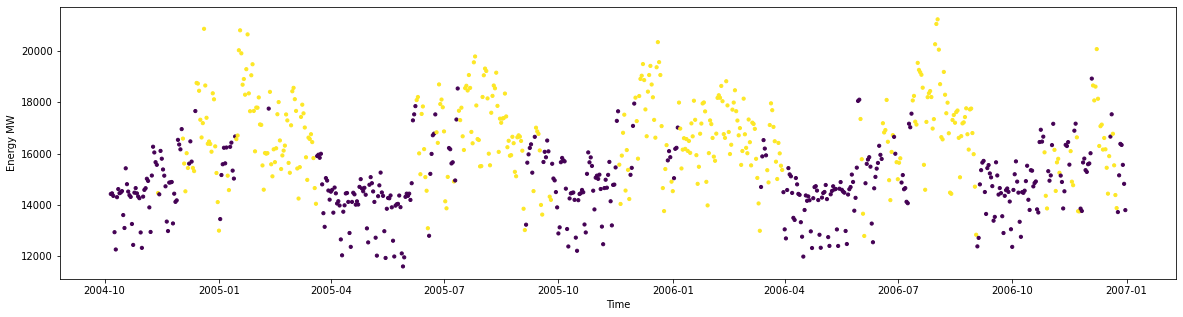

In [80]:
plt.figure(figsize=(20,5))
plt.scatter(df_A_values_3.index, df_A_values_3['AEP_MW'], c= df_A_values_3['Cluster'], s=10)
plt.xlabel('Time')
plt.ylabel('Energy MW')
plt.show()

In [75]:
# Podemos notar que los puntos mínimos de consumo energético se presentan en otoño y primavera. 
# Mientras que los picos se presentan en invierno y verano 